**Post-Covid Psychological Distress Detection Using Machine Learning Techniques**

# Data fetch

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
#Connecting to Google drive account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1ul0BuVLPCYNQ3hQAopDGyd_vUeKgwxhU'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Dataset')

In [4]:
#Loading the dataset to a Pandas Dataframe
import pandas as pd
df = pd.read_csv('Dataset') 

# Analyzing data


In [5]:
#Checking the dataframe
print(df.head(1))
print(df.shape)

           Timestamp    Age Gender Marital Status Profession Family type  \
0  8/7/2022 11:24:40  18-24   Male      Unmarried    Student     Nuclear   

  How would you describe your area of residence during COVID-19?  \
0                                          Sub-urban               

  How would you describe the ease of access to the nearest medical support from your area of residence during COVID-19?  \
0                           Close but Hard to Manage                                                                      

  Did you live with your family members during COVID-19?  \
0                                                Yes       

  What is your current monthly income?  ...  \
0                 Less than 10,000 BDT  ...   

  Have you lost any family member(s) due to COVID-19?  \
0                                                 No    

  Did you ever take mental health counseling?  \
0                                          No   

  Did you experience any level of

In [6]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Marital Status', 'Profession',
       'Family type',
       'How would you describe your area of residence during COVID-19?',
       'How would you describe the ease of access to the nearest medical support from your area of residence during COVID-19?',
       'Did you live with your family members during COVID-19?',
       'What is your current monthly income?',
       'What is your familys current monthly income?',
       'Did your family have a consistent monthly income during COVID-19?',
       'Who is the primary earner of your family?',
       'Did you lose your job during COVID-19?',
       'Did any of your family member(s) lose jobs during COVID-19?',
       'Were your ever pressured to work extra hours during COVID-19 by your employer?',
       'Do you work from home currently?',
       'Did you have to discontinue your studies during COVID-19? ',
       'Have you ever been infected with COVID-19?',
       'Has any of your family member(s)

In [7]:
#Dropping the Timestamp column
df =  df.drop(columns = 'Timestamp')

In [8]:
df.head()

,Age,Gender,Marital Status,Profession,Family type,How would you describe your area of residence during COVID-19?,How would you describe the ease of access to the nearest medical support from your area of residence during COVID-19?,Did you live with your family members during COVID-19?,What is your current monthly income?,What is your familys current monthly income?,...,Have you lost any family member(s) due to COVID-19?,Did you ever take mental health counseling?,Did you experience any level of depression or anxiety during COVID-19 lockdown?,"Feeling nervous, anxious, or on edge",Not being able to stop or control worrying,Worrying too much about different things,Trouble relaxing,Being so restless that it is hard to sit still,Becoming easily annoyed or irritable,"Feeling afraid, as if something awful might happen"
0,18-24,Male,Unmarried,Student,Nuclear,Sub-urban,Close but Hard to Manage,Yes,"Less than 10,000 BDT","More than 1,50,00 BDT",...,No,No,No,1,0,2,1,0,3,2
1,18-24,Female,Unmarried,Student,Nuclear,Urban,Close and Manageable.,Yes,"10,000BDT - 39,000BDT","1,20,000 - 1,49,999 BDT",...,No,No,Yes,2,2,2,2,0,2,2
2,18-24,Male,Unmarried,Student,Nuclear,Sub-urban,Close and Manageable.,Yes,I do not have any income at the moment,"70,000 - 99,999 BDT",...,No,Yes,No,0,0,0,0,0,0,0
3,18-24,Male,Unmarried,Student,Nuclear,Rural,Close and Manageable.,Yes,"Less than 10,000 BDT","Less than 30,000 BDT",...,No,No,Yes,1,1,1,1,2,3,3
4,18-24,Male,Unmarried,Student,Nuclear,Rural,Close but Hard to Manage,Yes,I do not have any income at the moment,"Less than 30,000 BDT",...,No,No,Yes,2,1,2,2,2,2,1


## Modifying and visualizing data

In [9]:
#Renaming the column titles.
newAttributeNames = {'Age':'age', 'Gender':'gender', 'Marital Status':'mar_status', 'Profession':'profession',
       'Family type':'family_type',
       'How would you describe your area of residence during COVID-19?':'res_area',
       'How would you describe the ease of access to the nearest medical support from your area of residence during COVID-19?':'med_support',
       'Did you live with your family members during COVID-19?':'living_style',
       'What is your current monthly income?':'monthly_income',
       'What is your familys current monthly income?':'family_income',
       'Did your family have a consistent monthly income during COVID-19?':'earn_consistency',
       'Who is the primary earner of your family?':'prim_earner',
       'Did you lose your job during COVID-19?':'job_covid',
       'Did any of your family member(s) lose jobs during COVID-19?':'lose_job',
       'Were your ever pressured to work extra hours during COVID-19 by your employer?':'work_pressure',
       'Do you work from home currently?':'work_home',
       'Did you have to discontinue your studies during COVID-19? ':'study',
       'Have you ever been infected with COVID-19?':'covid_infec',
       'Has any of your family member(s) ever been infected with COVID-19?':'covid_infec_fam',
       'Have you lost any family member(s) due to COVID-19?':'lose_family',
       'Did you ever take mental health counseling?':'mental_counsel',
       'Did you experience any level of depression or anxiety during COVID-19 lockdown?':'anx_covid',
       ' Feeling nervous, anxious, or on edge  ':'psy_nervous',
       'Not being able to stop or control worrying  ':'psy_worry',
       'Worrying too much about different things ':'psy_diff_worry', 'Trouble relaxing ':'psy_trouble_relax',
       'Being so restless that it is hard to sit still ':'psy_restless',
       'Becoming easily annoyed or irritable ':'psy_annoy',
       'Feeling afraid, as if something awful might happen ':'psy_fear'} 
df.rename(newAttributeNames, axis=1, inplace=True)

In [10]:
df.columns

Index(['age', 'gender', 'mar_status', 'profession', 'family_type', 'res_area',
       'med_support', 'living_style', 'monthly_income', 'family_income',
       'earn_consistency', 'prim_earner', 'job_covid', 'lose_job',
       'work_pressure', 'work_home', 'study', 'covid_infec', 'covid_infec_fam',
       'lose_family', 'mental_counsel', 'anx_covid', 'psy_nervous',
       'psy_worry', 'psy_diff_worry', 'psy_trouble_relax', 'psy_restless',
       'psy_annoy', 'psy_fear'],
      dtype='object')

In [11]:
unique_vals = df['age'].unique()
print(unique_vals)
print(len(unique_vals))

['18-24' '25-34' '45-54' '35-44' 'Below 18']
5


In [12]:
#Importing all necessary libraries
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

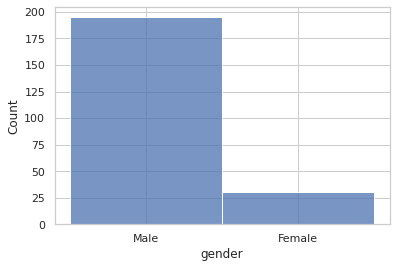

In [13]:
sns.set(style = 'whitegrid')
sns.histplot(x='gender', data = df);

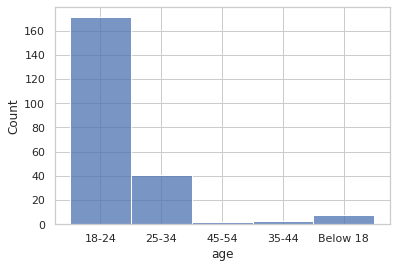

In [14]:
sns.set(style = 'whitegrid')
sns.histplot(x='age', data = df); #may be consideredvto drop

Assigning label to categorical value of age.

In [15]:
#Scaling age
# 'Below 18' - CH
# '18 - 24' - YA
# '25 - 34' - AD
# '35 - 44' - OA
# '45 - 54' - OL

ageScale = {'Below 18':'CH', '18-24':'YA',
       '25-34':'AD', '35-44':'OA',
       '45-54':'OL'}

In [16]:
df['age'].replace(ageScale, inplace = True)

In [17]:
df.head()

,age,gender,mar_status,profession,family_type,res_area,med_support,living_style,monthly_income,family_income,...,lose_family,mental_counsel,anx_covid,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear
0,YA,Male,Unmarried,Student,Nuclear,Sub-urban,Close but Hard to Manage,Yes,"Less than 10,000 BDT","More than 1,50,00 BDT",...,No,No,No,1,0,2,1,0,3,2
1,YA,Female,Unmarried,Student,Nuclear,Urban,Close and Manageable.,Yes,"10,000BDT - 39,000BDT","1,20,000 - 1,49,999 BDT",...,No,No,Yes,2,2,2,2,0,2,2
2,YA,Male,Unmarried,Student,Nuclear,Sub-urban,Close and Manageable.,Yes,I do not have any income at the moment,"70,000 - 99,999 BDT",...,No,Yes,No,0,0,0,0,0,0,0
3,YA,Male,Unmarried,Student,Nuclear,Rural,Close and Manageable.,Yes,"Less than 10,000 BDT","Less than 30,000 BDT",...,No,No,Yes,1,1,1,1,2,3,3
4,YA,Male,Unmarried,Student,Nuclear,Rural,Close but Hard to Manage,Yes,I do not have any income at the moment,"Less than 30,000 BDT",...,No,No,Yes,2,1,2,2,2,2,1


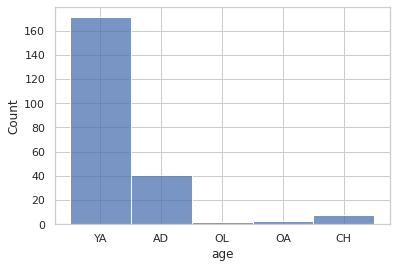

In [18]:
sns.set(style = 'whitegrid')
sns.histplot(x='age', data = df); #may be consideredvto drop

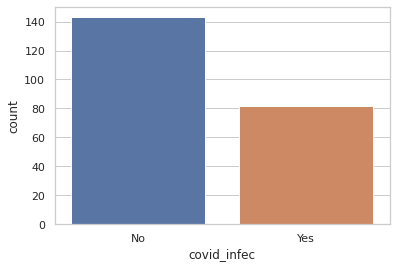

In [19]:
sns.countplot(x='covid_infec', data = df)

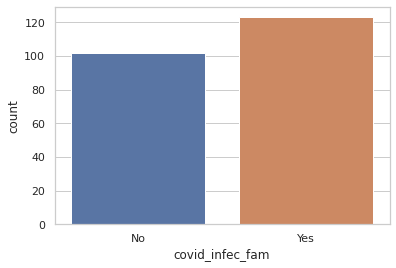

In [20]:
sns.countplot(x='covid_infec_fam', data = df)

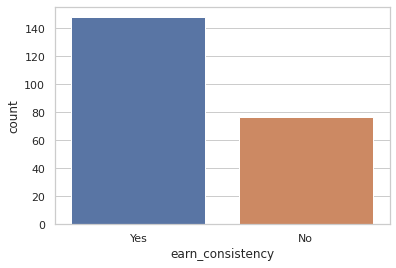

In [21]:
sns.countplot(x='earn_consistency', data = df)

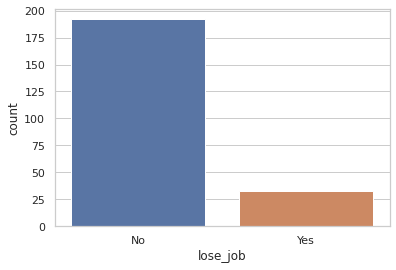

In [22]:
sns.countplot(x='lose_job', data = df)

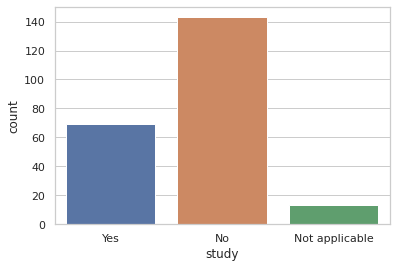

In [23]:
sns.countplot(x='study', data = df)

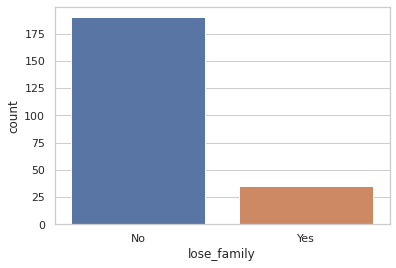

In [24]:
sns.countplot(x='lose_family', data = df)

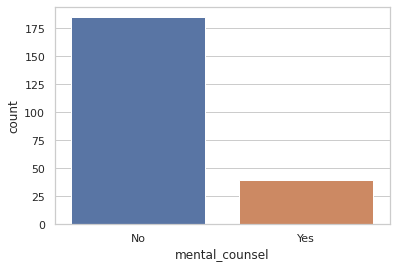

In [25]:
sns.countplot(x='mental_counsel', data = df)

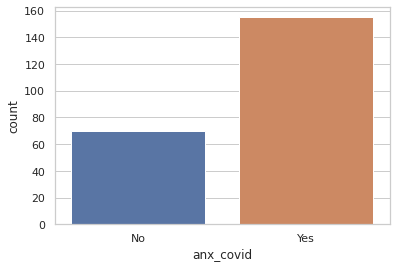

In [26]:
sns.countplot(x='anx_covid', data = df)

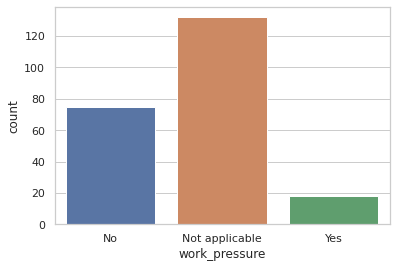

In [27]:
sns.countplot(x='work_pressure', data = df)

Visualzing the categories of psychological evaluation by quantity. 

In [28]:
#Scaling Emotional responses (in contrast to nervousness)
#Scale Range : 1-5 represents Least positive - Most Positive
unique_vals = df['psy_nervous'].unique()
unique_vals

array([1, 2, 0, 3])

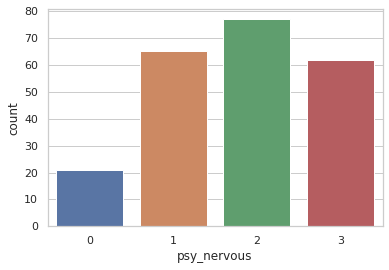

In [29]:
sns.countplot(x='psy_nervous',data=df)

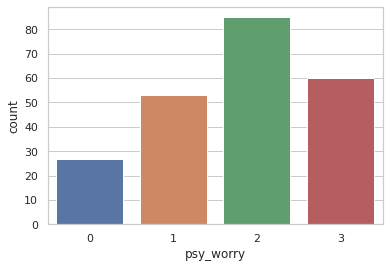

In [30]:
sns.countplot(x='psy_worry',data=df)

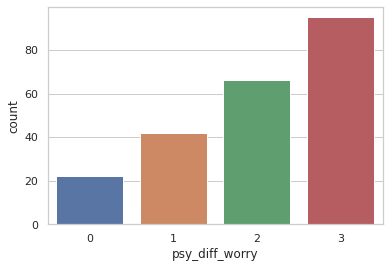

In [31]:
sns.countplot(x='psy_diff_worry',data=df)

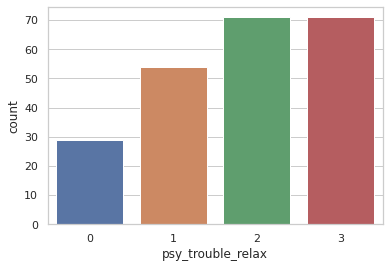

In [32]:
sns.countplot(x='psy_trouble_relax',data=df)

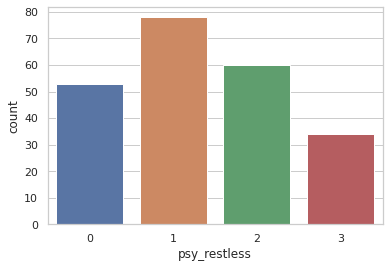

In [33]:
sns.countplot(x='psy_restless',data=df)

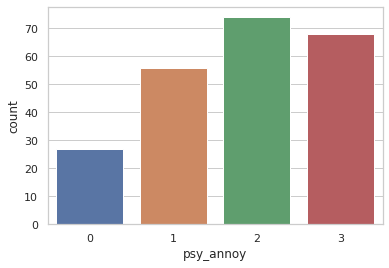

In [34]:
sns.countplot(x='psy_annoy',data=df)

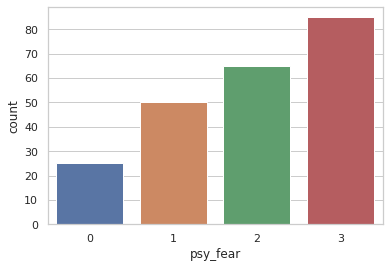

In [35]:
sns.countplot(x='psy_fear',data=df)

Visualizing other data points.

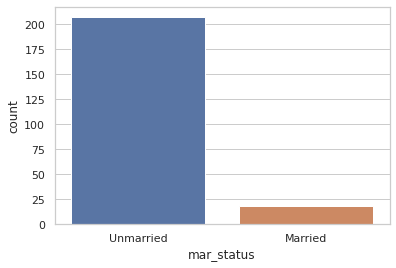

In [36]:
sns.countplot(x='mar_status',data=df)

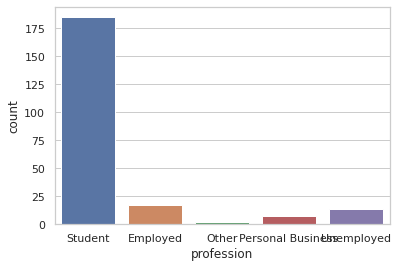

In [37]:
sns.countplot(x='profession',data=df)

In [38]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  age  has  5  unique values ---->  ['YA' 'AD' 'OL' 'OA' 'CH']
Feature  gender  has  2  unique values ---->  ['Male' 'Female']
Feature  mar_status  has  2  unique values ---->  ['Unmarried' 'Married']
Feature  profession  has  5  unique values ---->  ['Student' 'Employed' 'Other' 'Personal Business' 'Unemployed']
Feature  family_type  has  2  unique values ---->  ['Nuclear' 'Extended']
Feature  res_area  has  3  unique values ---->  ['Sub-urban' 'Urban' 'Rural']
Feature  med_support  has  4  unique values ---->  ['Close but Hard to Manage' 'Close and Manageable.' 'Far but Manageable'
 'Far and Hard to Manage']
Feature  living_style  has  2  unique values ---->  ['Yes' 'No']
Feature  monthly_income  has  8  unique values ---->  ['Less than 10,000 BDT' '10,000BDT - 39,000BDT'
 'I do not have any income at the moment' 'More than 1,00,000 BDT'
 '70,000 BDT - 99,999BDT' '50,000BDT - 69,999BDT' '10,000BDT - 29,999 BDT'
 '30,000BDT - 49,999BDT']
Feature  family_income  has  7  unique v

In [39]:
unique_vals = df['med_support'].unique()
unique_vals

array(['Close but Hard to Manage', 'Close and Manageable.',
       'Far but Manageable', 'Far and Hard to Manage'], dtype=object)

Assigning label to categorical value of medical support.

In [40]:
df['med_support'].replace({'Close but Hard to Manage':'CH', 'Far but Manageable':'FM',
       'Close and Manageable.':'CM', 'Far and Hard to Manage':'FH'}, inplace = True)

In [41]:
df.head()

,age,gender,mar_status,profession,family_type,res_area,med_support,living_style,monthly_income,family_income,...,lose_family,mental_counsel,anx_covid,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear
0,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CH,Yes,"Less than 10,000 BDT","More than 1,50,00 BDT",...,No,No,No,1,0,2,1,0,3,2
1,YA,Female,Unmarried,Student,Nuclear,Urban,CM,Yes,"10,000BDT - 39,000BDT","1,20,000 - 1,49,999 BDT",...,No,No,Yes,2,2,2,2,0,2,2
2,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CM,Yes,I do not have any income at the moment,"70,000 - 99,999 BDT",...,No,Yes,No,0,0,0,0,0,0,0
3,YA,Male,Unmarried,Student,Nuclear,Rural,CM,Yes,"Less than 10,000 BDT","Less than 30,000 BDT",...,No,No,Yes,1,1,1,1,2,3,3
4,YA,Male,Unmarried,Student,Nuclear,Rural,CH,Yes,I do not have any income at the moment,"Less than 30,000 BDT",...,No,No,Yes,2,1,2,2,2,2,1


In [42]:
unique_vals = df['family_income'].unique()
unique_vals

array(['More than 1,50,00 BDT', '1,20,000 - 1,49,999 BDT',
       '70,000 - 99,999 BDT', 'Less than 30,000 BDT',
       '30,000 - 49,999 BDT', '1,00,000 - 1,19,999 BDT',
       '50,000 - 69,999 BDT'], dtype=object)

Assigning label to categorical value of family income.

In [43]:
family_income_scale = {'More than 1,50,00 BDT':'SRI', '1,20,000 - 1,49,999 BDT':'RI',
       '70,000 - 99,999 BDT':'HMC', 'Less than 30,000 BDT':'LOI',
       '30,000 - 49,999 BDT':'LMC', '1,00,000 - 1,19,999 BDT':'HC',
       '50,000 - 69,999 BDT':'MC'}

In [44]:
df['family_income'].replace(family_income_scale, inplace = True)

In [45]:
df.head()

,age,gender,mar_status,profession,family_type,res_area,med_support,living_style,monthly_income,family_income,...,lose_family,mental_counsel,anx_covid,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear
0,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CH,Yes,"Less than 10,000 BDT",SRI,...,No,No,No,1,0,2,1,0,3,2
1,YA,Female,Unmarried,Student,Nuclear,Urban,CM,Yes,"10,000BDT - 39,000BDT",RI,...,No,No,Yes,2,2,2,2,0,2,2
2,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CM,Yes,I do not have any income at the moment,HMC,...,No,Yes,No,0,0,0,0,0,0,0
3,YA,Male,Unmarried,Student,Nuclear,Rural,CM,Yes,"Less than 10,000 BDT",LOI,...,No,No,Yes,1,1,1,1,2,3,3
4,YA,Male,Unmarried,Student,Nuclear,Rural,CH,Yes,I do not have any income at the moment,LOI,...,No,No,Yes,2,1,2,2,2,2,1


In [46]:
unique_vals = df['monthly_income'].unique()
unique_vals

array(['Less than 10,000 BDT', '10,000BDT - 39,000BDT',
       'I do not have any income at the moment', 'More than 1,00,000 BDT',
       '70,000 BDT - 99,999BDT', '50,000BDT - 69,999BDT',
       '10,000BDT - 29,999 BDT', '30,000BDT - 49,999BDT'], dtype=object)

Assigning label to categorical value of monthly income.

In [47]:
monthly_income_scale = {'Less than 10,000 BDT':'LO', '10,000BDT - 39,000BDT':'LMC',
       'I do not have any income at the moment':'NO', 'More than 1,00,000 BDT':'HI',
       '70,000 BDT - 99,999BDT':'HC', '50,000BDT - 69,999BDT':'HMC',
       '10,000BDT - 29,999 BDT':'LMC', '30,000BDT - 49,999BDT':'MC'}

In [48]:
df.head()

,age,gender,mar_status,profession,family_type,res_area,med_support,living_style,monthly_income,family_income,...,lose_family,mental_counsel,anx_covid,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear
0,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CH,Yes,"Less than 10,000 BDT",SRI,...,No,No,No,1,0,2,1,0,3,2
1,YA,Female,Unmarried,Student,Nuclear,Urban,CM,Yes,"10,000BDT - 39,000BDT",RI,...,No,No,Yes,2,2,2,2,0,2,2
2,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CM,Yes,I do not have any income at the moment,HMC,...,No,Yes,No,0,0,0,0,0,0,0
3,YA,Male,Unmarried,Student,Nuclear,Rural,CM,Yes,"Less than 10,000 BDT",LOI,...,No,No,Yes,1,1,1,1,2,3,3
4,YA,Male,Unmarried,Student,Nuclear,Rural,CH,Yes,I do not have any income at the moment,LOI,...,No,No,Yes,2,1,2,2,2,2,1


In [49]:
df['monthly_income'].replace(monthly_income_scale, inplace = True)

In [50]:
df.head()

,age,gender,mar_status,profession,family_type,res_area,med_support,living_style,monthly_income,family_income,...,lose_family,mental_counsel,anx_covid,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear
0,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CH,Yes,LO,SRI,...,No,No,No,1,0,2,1,0,3,2
1,YA,Female,Unmarried,Student,Nuclear,Urban,CM,Yes,LMC,RI,...,No,No,Yes,2,2,2,2,0,2,2
2,YA,Male,Unmarried,Student,Nuclear,Sub-urban,CM,Yes,NO,HMC,...,No,Yes,No,0,0,0,0,0,0,0
3,YA,Male,Unmarried,Student,Nuclear,Rural,CM,Yes,LO,LOI,...,No,No,Yes,1,1,1,1,2,3,3
4,YA,Male,Unmarried,Student,Nuclear,Rural,CH,Yes,NO,LOI,...,No,No,Yes,2,1,2,2,2,2,1


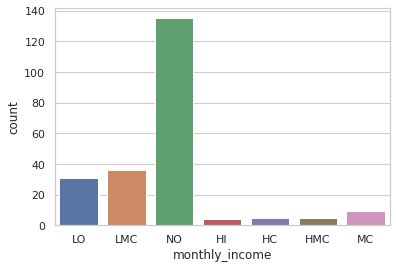

In [51]:
sns.countplot(x='monthly_income',data=df)

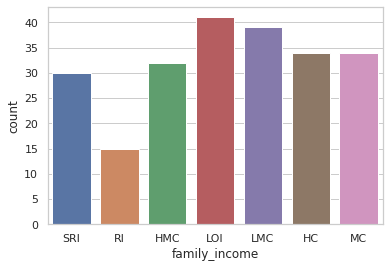

In [52]:
sns.countplot(x='family_income',data=df)

### Assigning dummy values to selected data columns

In [53]:
cat_features = ['gender','age' ,'mar_status','profession','family_type','res_area','med_support','living_style','monthly_income','family_income', 'earn_consistency', 'prim_earner','job_covid','lose_job','work_pressure', 'work_home','study','covid_infec', 'covid_infec_fam', 'lose_family', 'mental_counsel', 'anx_covid']
len(cat_features)

22

In [54]:
df = pd.get_dummies(data = df, columns = cat_features)

In [55]:
df.shape

(225, 77)

In [56]:
df.head()

,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear,gender_Female,gender_Male,age_AD,...,covid_infec_No,covid_infec_Yes,covid_infec_fam_No,covid_infec_fam_Yes,lose_family_No,lose_family_Yes,mental_counsel_No,mental_counsel_Yes,anx_covid_No,anx_covid_Yes
0,1,0,2,1,0,3,2,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,2,2,2,2,0,2,2,1,0,0,...,1,0,1,0,1,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
3,1,1,1,1,2,3,3,0,1,0,...,1,0,1,0,1,0,1,0,0,1
4,2,1,2,2,2,2,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


### Finalizing scores and labels based on answers to psychological questions 

In [57]:
#emotion_love	emotion_enjoyment	emotion_satisfaction	emotion_thankful	emotion_fear	emotion_anxiety
finalScore=[]
for score in df.index:
     totalScore = df['psy_nervous'][score] + df['psy_worry'][score] + df['psy_diff_worry'][score] + df['psy_trouble_relax'][score] + df['psy_restless'][score] + df['psy_annoy'][score] + df['psy_fear'][score]
     finalScore.append(totalScore)
print(finalScore)

[9, 12, 0, 12, 12, 0, 14, 18, 13, 2, 17, 9, 18, 11, 13, 17, 11, 10, 9, 4, 19, 14, 16, 14, 15, 14, 16, 9, 15, 14, 19, 10, 10, 7, 8, 5, 10, 13, 13, 3, 14, 17, 14, 19, 15, 5, 1, 21, 18, 13, 9, 7, 8, 14, 15, 5, 15, 3, 15, 9, 3, 14, 21, 21, 1, 21, 8, 21, 0, 20, 11, 16, 0, 10, 5, 8, 20, 17, 16, 21, 7, 6, 2, 13, 8, 5, 19, 13, 19, 7, 5, 1, 18, 12, 17, 14, 7, 17, 3, 7, 11, 12, 15, 7, 12, 10, 1, 14, 11, 11, 13, 15, 16, 15, 4, 15, 0, 13, 10, 5, 14, 17, 21, 15, 7, 8, 15, 18, 11, 4, 5, 20, 6, 10, 9, 13, 3, 18, 7, 6, 13, 16, 6, 21, 11, 11, 15, 1, 10, 13, 12, 15, 13, 13, 12, 17, 9, 0, 4, 12, 21, 12, 15, 11, 8, 10, 17, 21, 21, 8, 10, 17, 10, 14, 12, 16, 14, 20, 14, 14, 21, 15, 16, 14, 17, 18, 15, 19, 17, 18, 17, 18, 11, 17, 15, 21, 17, 21, 16, 14, 17, 18, 21, 16, 18, 13, 16, 14, 17, 17, 13, 19, 12, 19, 15, 15, 14, 13, 10, 16, 8, 17, 21, 12, 19]


In [58]:
len(finalScore)

225

Assigning label to numerical value of psychological scores.

This is labeled based on GAD-7 score. 


In [59]:
emotion_score = []
for score in finalScore:
  if score >= 15:
    print(score,':Severe')
    print()
    emotion_score.append('Severe')
  elif score>= 10 and score <= 14:
    print(score,':Moderate')
    print()
    emotion_score.append('Moderate')
  elif score>= 5 and score <= 9:
    print(score,':Mild')
    print()
    emotion_score.append('Mild')
  elif score <= 4:
    print(score,'Minimal')
    print()
    emotion_score.append('Minimal')

9 :Mild

12 :Moderate

0 Minimal

12 :Moderate

12 :Moderate

0 Minimal

14 :Moderate

18 :Severe

13 :Moderate

2 Minimal

17 :Severe

9 :Mild

18 :Severe

11 :Moderate

13 :Moderate

17 :Severe

11 :Moderate

10 :Moderate

9 :Mild

4 Minimal

19 :Severe

14 :Moderate

16 :Severe

14 :Moderate

15 :Severe

14 :Moderate

16 :Severe

9 :Mild

15 :Severe

14 :Moderate

19 :Severe

10 :Moderate

10 :Moderate

7 :Mild

8 :Mild

5 :Mild

10 :Moderate

13 :Moderate

13 :Moderate

3 Minimal

14 :Moderate

17 :Severe

14 :Moderate

19 :Severe

15 :Severe

5 :Mild

1 Minimal

21 :Severe

18 :Severe

13 :Moderate

9 :Mild

7 :Mild

8 :Mild

14 :Moderate

15 :Severe

5 :Mild

15 :Severe

3 Minimal

15 :Severe

9 :Mild

3 Minimal

14 :Moderate

21 :Severe

21 :Severe

1 Minimal

21 :Severe

8 :Mild

21 :Severe

0 Minimal

20 :Severe

11 :Moderate

16 :Severe

0 Minimal

10 :Moderate

5 :Mild

8 :Mild

20 :Severe

17 :Severe

16 :Severe

21 :Severe

7 :Mild

6 :Mild

2 Minimal

13 :Moderate

8 :Mil

In [60]:
len(emotion_score)

225

In [61]:
df['emotion_score'] = emotion_score

In [62]:
df.head()

,psy_nervous,psy_worry,psy_diff_worry,psy_trouble_relax,psy_restless,psy_annoy,psy_fear,gender_Female,gender_Male,age_AD,...,covid_infec_Yes,covid_infec_fam_No,covid_infec_fam_Yes,lose_family_No,lose_family_Yes,mental_counsel_No,mental_counsel_Yes,anx_covid_No,anx_covid_Yes,emotion_score
0,1,0,2,1,0,3,2,0,1,0,...,0,1,0,1,0,1,0,1,0,Mild
1,2,2,2,2,0,2,2,1,0,0,...,0,1,0,1,0,1,0,0,1,Moderate
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,Minimal
3,1,1,1,1,2,3,3,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate
4,2,1,2,2,2,2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate


Dropping individual scores of each psychological questions

In [63]:
dropList = ['psy_nervous', 'psy_worry', 'psy_diff_worry', 'psy_trouble_relax', 'psy_restless', 'psy_annoy', 'psy_fear']

In [64]:
df.drop(dropList,axis=1,inplace=True)

In [65]:
df.head()

,gender_Female,gender_Male,age_AD,age_CH,age_OA,age_OL,age_YA,mar_status_Married,mar_status_Unmarried,profession_Employed,...,covid_infec_Yes,covid_infec_fam_No,covid_infec_fam_Yes,lose_family_No,lose_family_Yes,mental_counsel_No,mental_counsel_Yes,anx_covid_No,anx_covid_Yes,emotion_score
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,Mild
1,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,Minimal
3,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate
4,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate


In [66]:
#the columns that require scaling include
y = df['emotion_score']
x = df.drop(columns=['emotion_score'])

In [67]:
y.value_counts()

Severe      91
Moderate    74
Mild        38
Minimal     22
Name: emotion_score, dtype: int64

In [68]:
df.head()

,gender_Female,gender_Male,age_AD,age_CH,age_OA,age_OL,age_YA,mar_status_Married,mar_status_Unmarried,profession_Employed,...,covid_infec_Yes,covid_infec_fam_No,covid_infec_fam_Yes,lose_family_No,lose_family_Yes,mental_counsel_No,mental_counsel_Yes,anx_covid_No,anx_covid_Yes,emotion_score
0,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,Mild
1,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate
2,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,Minimal
3,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate
4,0,1,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,Moderate


# Training Model

## Scaling data

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)
print(X_train.shape)
print(X_test.shape)

(180, 70)
(45, 70)


## KNN with Euclidean Distance Metric

In [70]:
from sklearn.metrics import accuracy_score

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.28888888888888886 , Difference =  71.11111111111111 %
K =  5 , Training Accuracy =  0.55  Test Accuracy =  0.3333333333333333 , Difference =  21.66666666666667 %
K =  10 , Training Accuracy =  0.5111111111111111  Test Accuracy =  0.3333333333333333 , Difference =  17.777777777777775 %
K =  15 , Training Accuracy =  0.48333333333333334  Test Accuracy =  0.4222222222222222 , Difference =  6.111111111111112 %
K =  20 , Training Accuracy =  0.4777777777777778  Test Accuracy =  0.4222222222222222 , Difference =  5.555555555555558 %
K =  25 , Training Accuracy =  0.45  Test Accuracy =  0.4 , Difference =  4.999999999999999 %
K =  30 , Training Accuracy =  0.4666666666666667  Test Accuracy =  0.4 , Difference =  6.666666666666665 %


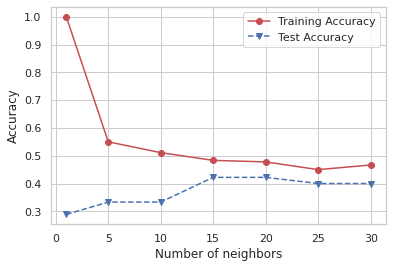

In [71]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_pred_Test))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

## Decision Tree

Depth =  2 , Training Accuracy =  0.4888888888888889 , Test Accuracy =  0.35555555555555557 , Diff =  13.33333333333333  %
Depth =  3 , Training Accuracy =  0.5555555555555556 , Test Accuracy =  0.3333333333333333 , Diff =  22.222222222222225  %
Depth =  4 , Training Accuracy =  0.6111111111111112 , Test Accuracy =  0.3111111111111111 , Diff =  30.000000000000004  %
Depth =  5 , Training Accuracy =  0.6944444444444444 , Test Accuracy =  0.3333333333333333 , Diff =  36.11111111111111  %
Depth =  6 , Training Accuracy =  0.7555555555555555 , Test Accuracy =  0.3333333333333333 , Diff =  42.22222222222222  %
Depth =  7 , Training Accuracy =  0.8333333333333334 , Test Accuracy =  0.3333333333333333 , Diff =  50.0  %
Depth =  8 , Training Accuracy =  0.8611111111111112 , Test Accuracy =  0.35555555555555557 , Diff =  50.55555555555556  %
Depth =  9 , Training Accuracy =  0.9055555555555556 , Test Accuracy =  0.37777777777777777 , Diff =  52.77777777777778  %
Depth =  10 , Training Accuracy 

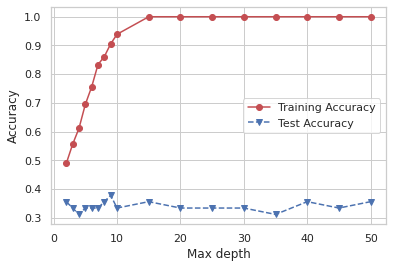

In [72]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_pred_Test)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

## Applying SMOTE

In [73]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=30)
X_train_n, y_train_n=sm.fit_resample(X_train, y_train)

In [74]:
print(X_train.shape)
print(X_test.shape)

(180, 70)
(45, 70)


## Decision Tree after SMOTE

Depth =  2 , Training Accuracy =  0.4607142857142857 , Test Accuracy =  0.4 , Diff =  6.071428571428567  %
Depth =  3 , Training Accuracy =  0.5142857142857142 , Test Accuracy =  0.37777777777777777 , Diff =  13.650793650793647  %
Depth =  4 , Training Accuracy =  0.575 , Test Accuracy =  0.4 , Diff =  17.499999999999993  %
Depth =  5 , Training Accuracy =  0.65 , Test Accuracy =  0.3333333333333333 , Diff =  31.66666666666667  %
Depth =  6 , Training Accuracy =  0.7071428571428572 , Test Accuracy =  0.3333333333333333 , Diff =  37.38095238095239  %
Depth =  7 , Training Accuracy =  0.7642857142857142 , Test Accuracy =  0.26666666666666666 , Diff =  49.76190476190476  %
Depth =  8 , Training Accuracy =  0.7892857142857143 , Test Accuracy =  0.2222222222222222 , Diff =  56.7063492063492  %
Depth =  9 , Training Accuracy =  0.8142857142857143 , Test Accuracy =  0.2222222222222222 , Diff =  59.20634920634921  %
Depth =  10 , Training Accuracy =  0.85 , Test Accuracy =  0.2222222222222222 

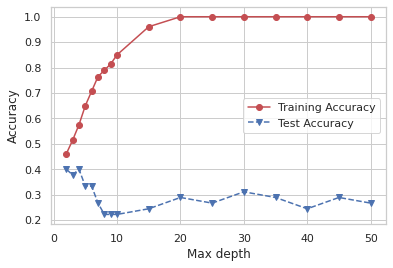

In [75]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_n, y_train_n)
    y_predTrain = clf.predict(X_train_n)
    y_pred_Test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train_n, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_pred_Test)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))

## Cross-validation

In [76]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
kfold_validation = KFold(n_splits = 10)
clf = DecisionTreeClassifier()

results = cross_val_score(clf, x, y, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.39130435 0.30434783 0.30434783 0.08695652 0.43478261 0.40909091
 0.27272727 0.36363636 0.36363636 0.36363636]

Results =  0.3294466403162056 +/- 0.09383523246746878


## Stratifying data

In [77]:
# For imbalance dataset
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
clf = DecisionTreeClassifier()
results = cross_val_score(clf, x, y, cv = skfold)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.28888889 0.33333333 0.31111111 0.37777778 0.42222222]

Results =  0.3466666666666667 +/- 0.047868131618973374


In [78]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=30)
X_n, y_n=sm.fit_resample(x, y)

In [79]:
unique, count= np.unique(y_n, return_counts=True)
counts={k:v for (k,v) in zip (unique, count)}
counts

{'Mild': 91, 'Minimal': 91, 'Moderate': 91, 'Severe': 91}

In [80]:
X_n.shape

(364, 70)

In [81]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
# for i in range(2,30):    
kfold_validation = KFold(n_splits = 12)
clf = DecisionTreeClassifier()

results = cross_val_score(clf,X_n, y_n, cv = kfold_validation)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.48387097 0.25806452 0.38709677 0.29032258 0.23333333 0.2
 0.23333333 0.73333333 0.66666667 0.93333333 0.96666667 0.8       ]

Results =  0.5155017921146953 +/- 0.2772815981268053


## Shuffle Split

In [82]:
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits = 10, test_size = 0.30)
clf = DecisionTreeClassifier()
results = cross_val_score(clf,X_n, y_n, cv = ssplit)
print(results)
print()
print ("Results = ", np.mean(results), "+/-", np.std(results))

[0.5        0.65454545 0.52727273 0.56363636 0.56363636 0.68181818
 0.56363636 0.54545455 0.59090909 0.50909091]

Results =  0.57 +/- 0.055899851416884395


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size = 0.2, random_state = 20)

## Decision Tree after final data modification

Depth =  2 , Training Accuracy =  0.40893470790378006 , Test Accuracy =  0.4931506849315068 , Diff =  8.421597702772676  %
Depth =  3 , Training Accuracy =  0.4742268041237113 , Test Accuracy =  0.5068493150684932 , Diff =  3.2622510944781857  %
Depth =  4 , Training Accuracy =  0.5292096219931272 , Test Accuracy =  0.5205479452054794 , Diff =  0.8661676787647732  %
Depth =  5 , Training Accuracy =  0.5807560137457045 , Test Accuracy =  0.410958904109589 , Diff =  16.97971096361155  %
Depth =  6 , Training Accuracy =  0.6735395189003437 , Test Accuracy =  0.5068493150684932 , Diff =  16.66902038318505  %
Depth =  7 , Training Accuracy =  0.7250859106529209 , Test Accuracy =  0.547945205479452 , Diff =  17.71407051734689  %
Depth =  8 , Training Accuracy =  0.7972508591065293 , Test Accuracy =  0.547945205479452 , Diff =  24.930565362707725  %
Depth =  9 , Training Accuracy =  0.8419243986254296 , Test Accuracy =  0.5205479452054794 , Diff =  32.13764534199501  %
Depth =  10 , Training 

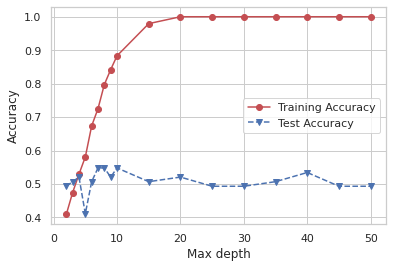

In [84]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_pred_Test)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

#########################################
# Table for Precision, Recal & F1 Score
#########################################
from sklearn import metrics
print('-------------------------------------')
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_Test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_Test, digits = 3))

## KNN after final data modification

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.5342465753424658 , Difference =  46.57534246575342 %
K =  5 , Training Accuracy =  0.6288659793814433  Test Accuracy =  0.4657534246575342 , Difference =  16.311255472390908 %
K =  10 , Training Accuracy =  0.5532646048109966  Test Accuracy =  0.5068493150684932 , Difference =  4.641528974250342 %
K =  15 , Training Accuracy =  0.5154639175257731  Test Accuracy =  0.5342465753424658 , Difference =  1.8782657816692638 %
K =  20 , Training Accuracy =  0.4536082474226804  Test Accuracy =  0.4931506849315068 , Difference =  3.9542437508826414 %
K =  25 , Training Accuracy =  0.46048109965635736  Test Accuracy =  0.4657534246575342 , Difference =  0.5272325001176859 %
K =  30 , Training Accuracy =  0.42955326460481097  Test Accuracy =  0.4246575342465753 , Difference =  0.48957303582356504 %


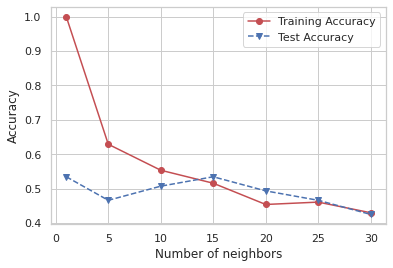

In [85]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_pred_Test = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_pred_Test))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

## Logistic Regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, random_state = 20)

In [88]:
clf = LogisticRegression()
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_pred_Test = clf.predict(X_test)
trainAcc = accuracy_score(y_train, y_predTrain)
testAcc = accuracy_score(y_test, y_pred_Test)
print("Training Accuracy = ", trainAcc, ", Test Accuracy = ", testAcc, 
          ", Diff = ", np.abs((trainAcc-testAcc)*100), " %")


Training Accuracy =  0.7692307692307693 , Test Accuracy =  0.5054945054945055 , Diff =  26.37362637362638  %


# Confusion Matrix

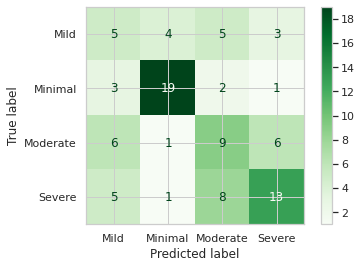

In [99]:
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Greens', values_format = '.3g')